In [1]:
# import packages
import pandas as pd
import datetime as dt
from datetime import date
from sqlalchemy import create_engine
from config import password
from config import DB_name
import matplotlib.pyplot as plt 


In [2]:
crashes = pd.read_csv("Resources/crashes.csv")

In [3]:
crashes.columns

Index(['X', 'Y', 'OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL',
       'RMA', 'RMA_ALL', 'DIVIDED', 'DIVIDE

In [4]:
# add columns we want to remove to a list
remove_columns = ["OBJECTID","VICGRID_X","VICGRID_Y","SRNS","SRNS_ALL","DIVIDED_ALL","DIVIDED","REGION_NAME","LGA_NAME","DEG_URBAN_NAME","RMA_ALL","RMA","NODE_TYPE","NODE_ID","POLICE_ATTEND","ABS_CODE","ACCIDENT_STATUS","UNKNOWN","INJ_OR_FATAL","X","Y"]

In [5]:
# remove unwanted columns
crashes = crashes.drop(remove_columns,axis= 1)

In [6]:
# check if columns have been removed
crashes.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME',
       'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'LONGITUDE', 'LATITUDE', 'TOTAL_PERSONS', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER',
       'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES',
       'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'STAT_DIV_NAME'],
      dtype='object')

In [7]:
# check for NA values
crashes.isna().sum()[crashes.isna().sum()>0]

DAY_OF_WEEK         2899
NO_OF_VEHICLES         8
HEAVYVEHICLE           8
PASSENGERVEHICLE       8
MOTORCYCLE             8
PUBLICVEHICLE          8
REGION_NAME_ALL        1
STAT_DIV_NAME          2
dtype: int64

In [8]:
# check for blank data
crashes[crashes==" "].sum()

ACCIDENT_NO            0
ACCIDENT_DATE          0
ACCIDENT_TIME          0
ALCOHOLTIME            0
ACCIDENT_TYPE          0
DAY_OF_WEEK            0
DCA_CODE               0
HIT_RUN_FLAG           0
LIGHT_CONDITION        0
ROAD_GEOMETRY          0
SEVERITY               0
SPEED_ZONE             0
RUN_OFFROAD            0
LONGITUDE            0.0
LATITUDE             0.0
TOTAL_PERSONS        0.0
FATALITY             0.0
SERIOUSINJURY        0.0
OTHERINJURY          0.0
NONINJURED           0.0
MALES                0.0
FEMALES              0.0
BICYCLIST            0.0
PASSENGER            0.0
DRIVER               0.0
PEDESTRIAN           0.0
PILLION              0.0
MOTORIST             0.0
PED_CYCLIST_5_12     0.0
PED_CYCLIST_13_18    0.0
OLD_PEDESTRIAN       0.0
OLD_DRIVER           0.0
YOUNG_DRIVER         0.0
ALCOHOL_RELATED        0
UNLICENCSED          0.0
NO_OF_VEHICLES       0.0
HEAVYVEHICLE         0.0
PASSENGERVEHICLE     0.0
MOTORCYCLE           0.0
PUBLICVEHICLE        0.0


In [9]:
# check for duplicates
crashes["ACCIDENT_NO"].value_counts()

T20150013821    1
T20190010572    1
T20190008283    1
T20190008282    1
T20190008277    1
               ..
T20170006132    1
T20170006131    1
T20170006112    1
T20170006096    1
T20210020248    1
Name: ACCIDENT_NO, Length: 75320, dtype: int64

In [10]:
crashes["ACCIDENT_DATE"].value_counts()

2015/12/09 00:00:00+00    76
2016/04/29 00:00:00+00    75
2016/03/10 00:00:00+00    75
2015/12/04 00:00:00+00    73
2017/04/21 00:00:00+00    72
                          ..
2020/04/18 00:00:00+00    13
2020/04/13 00:00:00+00    12
2020/04/26 00:00:00+00    11
2020/04/14 00:00:00+00    11
2020/04/17 00:00:00+00    10
Name: ACCIDENT_DATE, Length: 1827, dtype: int64

In [11]:
# Check out the dataframe using describe and info
crashes.describe()

,LONGITUDE,LATITUDE,TOTAL_PERSONS,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
count,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,...,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75312.000000,75312.000000,75312.000000,75312.000000,75312.000000
mean,144.749623,-37.651430,2.338808,0.022039,0.418401,0.833510,1.064697,1.296867,0.914073,0.093640,...,0.015414,0.023579,0.070605,0.285661,0.035170,1.790246,0.046673,1.406177,0.157877,0.012083
std,5.710842,1.486289,1.489373,0.156444,0.644978,0.780954,1.264015,0.977108,1.044578,0.302113,...,0.128367,0.156134,0.262363,0.508034,0.185503,0.764615,0.223708,0.930047,0.374118,0.110466
min,-1.000000,-39.023993,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,144.828309,-37.957120,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,145.015099,-37.814551,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,145.213767,-37.689343,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,149.757513,-1.000000,89.000000,6.000000,18.000000,44.000000,87.000000,30.000000,51.000000,7.000000,...,5.000000,3.000000,3.000000,5.000000,2.000000,21.000000,4.000000,19.000000,5.000000,2.000000


In [12]:
# explored data a bit
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75320 entries, 0 to 75319
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCIDENT_NO        75320 non-null  object 
 1   ACCIDENT_DATE      75320 non-null  object 
 2   ACCIDENT_TIME      75320 non-null  object 
 3   ALCOHOLTIME        75320 non-null  object 
 4   ACCIDENT_TYPE      75320 non-null  object 
 5   DAY_OF_WEEK        72421 non-null  object 
 6   DCA_CODE           75320 non-null  object 
 7   HIT_RUN_FLAG       75320 non-null  object 
 8   LIGHT_CONDITION    75320 non-null  object 
 9   ROAD_GEOMETRY      75320 non-null  object 
 10  SEVERITY           75320 non-null  object 
 11  SPEED_ZONE         75320 non-null  object 
 12  RUN_OFFROAD        75320 non-null  object 
 13  LONGITUDE          75320 non-null  float64
 14  LATITUDE           75320 non-null  float64
 15  TOTAL_PERSONS      75320 non-null  int64  
 16  FATALITY           753

In [13]:
crashes.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME',
       'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'LONGITUDE', 'LATITUDE', 'TOTAL_PERSONS', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER',
       'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES',
       'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'STAT_DIV_NAME'],
      dtype='object')

In [14]:
#drop all NA's
crashes = crashes.dropna(axis = 0)

In [15]:
crashes.isna().sum()

ACCIDENT_NO          0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
DCA_CODE             0
HIT_RUN_FLAG         0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
RUN_OFFROAD          0
LONGITUDE            0
LATITUDE             0
TOTAL_PERSONS        0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE           0
PUBLICVEHICLE        0
DEG_URBAN_ALL        0
LGA_NAME_ALL         0
REGION_NAME_ALL      0
STAT_DIV_NA

In [16]:
# load data
lga = pd.read_csv("Resources/lga.csv")

In [17]:
# Explore dataframe
lga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LGA code                   79 non-null     int64  
 1   Local Government Area      79 non-null     object 
 2    ERP 2017                  79 non-null     int64  
 3   ERP 2018                   79 non-null     int64  
 4      2017 - 2018 no.         79 non-null     int64  
 5    2017 - 2018 %             79 non-null     float64
 6   Natural increase no        79 non-null     int64  
 7   Net internal migration no  79 non-null     int64  
 8   Net overseas migration no  79 non-null     int64  
 9   km2                        79 non-null     float64
 10  persons/km2                79 non-null     float64
dtypes: float64(3), int64(7), object(1)
memory usage: 6.9+ KB


In [18]:
lga

,LGA code,Local Government Area,ERP 2017,ERP 2018,2017 - 2018 no.,2017 - 2018 %,Natural increase no,Net internal migration no,Net overseas migration no,km2,persons/km2
0,20110,Alpine (S),12638,12730,92,0.7,-22,42,72,4788.2,2.7
1,20260,Ararat (RC),11756,11795,39,0.3,-16,-9,64,4211.1,2.8
2,20570,Ballarat (C),105422,107325,1903,1.8,473,883,547,739.0,145.2
3,20660,Banyule (C),129115,130237,1122,0.9,755,-922,1289,62.5,2082.5
4,20740,Bass Coast (S),34386,35327,941,2.7,-51,871,121,865.8,40.8
...,...,...,...,...,...,...,...,...,...,...,...
74,27170,Wodonga (C),40812,41429,617,1.5,273,156,188,432.7,95.7
75,27260,Wyndham (C),241071,255322,14251,5.9,4062,5472,4717,542.1,471.0
76,27350,Yarra (C),95994,98521,2527,2.6,808,-167,1886,19.5,5041.4
77,27450,Yarra Ranges (S),156869,158173,1304,0.8,1004,-342,642,2468.2,64.1


In [19]:
# Select required columns only
lga = lga[['Local Government Area', 'ERP 2018']]

In [20]:
# Create dataframe with only the columns we need and rename ERP (Estimated Resident Population)column
lga_2 = lga.rename(columns= {"ERP 2018": "Population Size"})
lga_2

,Local Government Area,Population Size
0,Alpine (S),12730
1,Ararat (RC),11795
2,Ballarat (C),107325
3,Banyule (C),130237
4,Bass Coast (S),35327
...,...,...
74,Wodonga (C),41429
75,Wyndham (C),255322
76,Yarra (C),98521
77,Yarra Ranges (S),158173


In [21]:
# new data frame with split value columns
new = lga_2["Local Government Area"].str.split(" ", n = 1, expand = True)
  
# making separate LGA column from new data frame
lga_2["LGA"]= new[0]
  
# making separate letter column from new data frame
lga_2["letter"]= new[1]
  
# Dropping Local Government Area column
lga_2.drop(columns =["Local Government Area","letter"], inplace = True)
lga_2

,Population Size,LGA
0,12730,Alpine
1,11795,Ararat
2,107325,Ballarat
3,130237,Banyule
4,35327,Bass
...,...,...
74,41429,Wodonga
75,255322,Wyndham
76,98521,Yarra
77,158173,Yarra


In [22]:
final_lga = lga_2.reset_index()
final_lga= final_lga.drop("index",axis=1)
final_lga

,Population Size,LGA
0,12730,Alpine
1,11795,Ararat
2,107325,Ballarat
3,130237,Banyule
4,35327,Bass
...,...,...
74,41429,Wodonga
75,255322,Wyndham
76,98521,Yarra
77,158173,Yarra


In [23]:
# convert all lga_name to match the ones in lga dat set
crashes["LGA_NAME_ALL"] = crashes["LGA_NAME_ALL"].str.title()

In [24]:
final_data = crashes.copy()
# join datasets
final_data = pd.merge(crashes,final_lga, how = 'inner',left_on = "LGA_NAME_ALL",right_on ="LGA")

In [25]:
final_data

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,ROAD_GEOMETRY,...,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,STAT_DIV_NAME,Population Size,LGA
0,T20150013821,2015/07/01 00:00:00+00,1899/12/30 07:00:00+00,No,Collision with vehicle,Wednesday,REAR END(VEHICLES IN SAME LANE),No,Dusk/Dawn,Not at intersection,...,0.0,4.0,0.0,0.0,MELB_URBAN,Casey,METROPOLITAN SOUTH EAST REGION,Metro,340419,Casey
1,T20150013832,2015/07/01 00:00:00+00,1899/12/30 09:55:00+00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,Day,Cross intersection,...,0.0,1.0,0.0,1.0,MELB_URBAN,Casey,METROPOLITAN SOUTH EAST REGION,Metro,340419,Casey
2,T20150013820,2015/07/01 00:00:00+00,1899/12/30 04:30:00+00,Yes,Struck Pedestrian,Wednesday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,Dark Street lights on,Not at intersection,...,1.0,0.0,0.0,0.0,MELB_URBAN,Casey,METROPOLITAN SOUTH EAST REGION,Metro,340419,Casey
3,T20150013874,2015/07/01 00:00:00+00,1899/12/30 17:15:00+00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,Dark Street lights on,T intersection,...,0.0,1.0,1.0,0.0,MELB_URBAN,Casey,METROPOLITAN SOUTH EAST REGION,Metro,340419,Casey
4,T20150013881,2015/07/01 00:00:00+00,1899/12/30 06:30:00+00,No,Collision with vehicle,Wednesday,REAR END(VEHICLES IN SAME LANE),No,Dusk/Dawn,Not at intersection,...,0.0,2.0,0.0,0.0,MELB_URBAN,Casey,METROPOLITAN SOUTH EAST REGION,Metro,340419,Casey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50223,T20190003129,2019/02/18 00:00:00+00,1899/12/30 13:30:00+00,No,Collision with a fixed object,Monday,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,Yes,Day,Not at intersection,...,0.0,1.0,0.0,0.0,TOWNS,Queenscliffe,SOUTH WESTERN REGION,Country,2982,Queenscliffe
50224,T20190005602,2019/03/23 00:00:00+00,1899/12/30 21:30:00+00,Yes,Collision with a fixed object,Saturday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Dark Street lights on,T intersection,...,0.0,0.0,1.0,0.0,TOWNS,Queenscliffe,SOUTH WESTERN REGION,Country,2982,Queenscliffe
50225,T20190017649,2019/09/12 00:00:00+00,1899/12/30 12:18:00+00,No,Collision with vehicle,Thursday,U TURN,No,Day,Not at intersection,...,0.0,2.0,0.0,0.0,TOWNS,Queenscliffe,SOUTH WESTERN REGION,Country,2982,Queenscliffe
50226,T20200000092,2019/12/31 00:00:00+00,1899/12/30 10:40:00+00,No,Collision with vehicle,Monday,VEHICLE STRIKES ANOTHER VEH WHILE EMERGING FRO...,No,Day,Not at intersection,...,0.0,1.0,0.0,0.0,TOWNS,Queenscliffe,SOUTH WESTERN REGION,Country,2982,Queenscliffe


In [26]:
final_data.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME',
       'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'LONGITUDE', 'LATITUDE', 'TOTAL_PERSONS', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER',
       'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES',
       'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'STAT_DIV_NAME',
       'Population Size', 'LGA'],
      dtype='object')

In [27]:
# accident table
# create new ID columns
final_data["ACCIDENT_LIGHT_CONDITION_ID"] = (final_data["LIGHT_CONDITION"].astype("category").cat.codes+1)
final_data["ACCIDENT_SEVERITY_ID"] = (final_data["SEVERITY"].astype("category").cat.codes+1)
final_data["ROAD_ID"] = (final_data["ROAD_GEOMETRY"].astype("category").cat.codes+1)
final_data["ACCIDENT_TYPE_ID"] = (final_data["ACCIDENT_TYPE"].astype("category").cat.codes+1)
final_data["STATE_DIV_ID"] = final_data["STAT_DIV_NAME"].astype("category").cat.codes+1
final_data["DEGREE_URBAN_ID"] = final_data["DEG_URBAN_ALL"].astype("category").cat.codes+1
final_data["LGA_ID"] = final_data["LGA_NAME_ALL"].astype("category").cat.codes+1
final_data["REGION_ID"] = final_data["REGION_NAME_ALL"].astype("category").cat.codes+1
final_data["ACCIDENT_TYPE_ID"] = final_data["ACCIDENT_TYPE"].astype("category").cat.codes+1

In [28]:
# Accident light condition table
accident_light_cond = pd.DataFrame(final_data["LIGHT_CONDITION"].unique())
accident_light_cond = accident_light_cond.rename(columns = {0:"LIGHT_CONDITION"})
accident_light_cond["ACCIDENT_LIGHT_CONDITION_ID"] = accident_light_cond["LIGHT_CONDITION"].astype("category").cat.codes+1
accident_light_cond = accident_light_cond.rename(columns={'LIGHT_CONDITION': 'ACCIDENT_LIGHT_CONDITION_DESCRIPTION'})
accident_light_cond

,ACCIDENT_LIGHT_CONDITION_DESCRIPTION,ACCIDENT_LIGHT_CONDITION_ID
0,Dusk/Dawn,6
1,Day,5
2,Dark Street lights on,3
3,Unk.,7
4,Dark No street lights,1
5,Dark Street lights unknown,4
6,Dark Street lights off,2


In [29]:
# change order of columns
accident_light_cond.insert(0,'ACCIDENT_LIGHT_CONDITION_ID',accident_light_cond.pop('ACCIDENT_LIGHT_CONDITION_ID'))

In [30]:
# accident severity
severity = pd.DataFrame(final_data["SEVERITY"].unique())
severity = severity.rename(columns = {0:"accident_severity_description"})
severity["ACCIDENT_SEVERITY_ID"] = severity["accident_severity_description"].astype("category").cat.codes+1
severity = severity.rename(columns={'accident_severity_description': 'ACCIDENT_SEVERITY_DESCRIPTION'})

In [31]:
# change order of columns
severity.insert(0,'ACCIDENT_SEVERITY_ID',severity.pop('ACCIDENT_SEVERITY_ID'))

In [32]:
severity

,ACCIDENT_SEVERITY_ID,ACCIDENT_SEVERITY_DESCRIPTION
0,4,Serious injury accident
1,1,Fatal accident
2,3,Other injury accident
3,2,Non injury accident


In [33]:
#Road Table
road = pd.DataFrame(final_data["ROAD_GEOMETRY"].unique())
road = road.rename(columns = {0:"ROAD_GEOMETRY"})
road["ROAD_ID"] = road["ROAD_GEOMETRY"].astype("category").cat.codes+1

In [34]:
# change order of columns
road.insert(0,'ROAD_ID',road.pop('ROAD_ID'))

In [35]:
road

,ROAD_ID,ROAD_GEOMETRY
0,4,Not at intersection
1,1,Cross intersection
2,7,T intersection
3,5,Private property
4,3,Multiple intersection
5,8,Unknown
6,9,Y intersection
7,2,Dead end
8,6,Road closure


In [36]:
# ROAD SPEED Table
road_speed = pd.DataFrame(final_data["SPEED_ZONE"].unique())
road_speed = road_speed.rename(columns = {0:"ROAD_SPEED"})
road_speed = road_speed.rename(columns={'ROAD_SPEED': 'ROAD_SPEED_ZONE'})

In [37]:
road_speed

,ROAD_SPEED_ZONE
0,100 km/hr
1,60 km/hr
2,80 km/hr
3,Camping grounds or off road
4,Not known
5,50 km/hr
6,70 km/hr
7,40 km/hr
8,30km/hr
9,Other speed limit


In [38]:
# accident type
accident_type = pd.DataFrame(final_data["ACCIDENT_TYPE"].unique())
accident_type = accident_type.rename(columns = {0:"ACCIDENT_TYPE_DESCRIPTION"})
accident_type["ACCIDENT_TYPE_ID"] = accident_type["ACCIDENT_TYPE_DESCRIPTION"].astype("category").cat.codes+1


In [39]:
# change order of columns
accident_type.insert(0,'ACCIDENT_TYPE_ID',accident_type.pop('ACCIDENT_TYPE_ID'))

In [40]:
accident_type

,ACCIDENT_TYPE_ID,ACCIDENT_TYPE_DESCRIPTION
0,2,Collision with vehicle
1,6,Struck Pedestrian
2,4,No collision and no object struck
3,1,Collision with a fixed object
4,8,Vehicle overturned (no collision)
5,9,collision with some other object
6,3,Fall from or in moving vehicle
7,7,Struck animal
8,5,Other accident


In [41]:
# state div
state_div = pd.DataFrame(final_data["STAT_DIV_NAME"].unique())
state_div = state_div.rename(columns = {0:"STAT_DIV_NAME"})
state_div["STATE_DIV_ID"] = state_div["STAT_DIV_NAME"].astype("category").cat.codes+1
state_div = state_div.rename(columns={'STAT_DIV_NAME': 'STATE_DIV_NAME'})

In [42]:
# change order of columns
state_div.insert(0,'STATE_DIV_ID',state_div.pop('STATE_DIV_ID'))

In [43]:
state_div

,STATE_DIV_ID,STATE_DIV_NAME
0,2,Metro
1,1,Country


In [44]:
# Degree_urban
urban = pd.DataFrame(final_data[["DEG_URBAN_ALL","STATE_DIV_ID","DEGREE_URBAN_ID"]])
urban = urban.drop_duplicates().reset_index().drop("index", axis=1)
# remove the dupliacted urban ids, some LGA are considered to be in multipl areas
# urban = urban.drop([8,12,1,14,15,16,17]).reset_index().drop("index", axis=1)

urban = urban.rename(columns = {"DEG_URBAN_ALL":"DEGREE_URBAN_DESCRIPTION"})


In [45]:
final_data.columns

Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME',
       'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'LONGITUDE', 'LATITUDE', 'TOTAL_PERSONS', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER',
       'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES',
       'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'STAT_DIV_NAME',
       'Population Size', 'LGA', 'ACCIDENT_LIGHT_CONDITION_ID',
       'ACCIDENT_SEVERITY_ID', 'ROAD_ID', 'ACCIDENT_TYPE_ID', 'STATE_DIV_ID',
       'DEGREE_URBAN_ID', 'LGA_ID', 'REGION_ID'],
      dtype='object')

In [46]:
# Region table
region = pd.DataFrame(final_data[["REGION_NAME_ALL","REGION_ID","DEGREE_URBAN_ID","STATE_DIV_ID"]])

region = region.rename(columns = {"REGION_NAME_ALL":"REGION_NAME"})
region = region.drop_duplicates().reset_index().drop("index", axis=1)
region = region.rename(columns = {"REGION_NAME_ALL":"REGION_NAME"})

In [47]:
region

,REGION_NAME,REGION_ID,DEGREE_URBAN_ID,STATE_DIV_ID
0,METROPOLITAN SOUTH EAST REGION,3,5,2
1,METROPOLITAN SOUTH EAST REGION,3,9,2
2,METROPOLITAN SOUTH EAST REGION,3,7,2
3,METROPOLITAN SOUTH EAST REGION,3,17,2
4,METROPOLITAN SOUTH EAST REGION,3,8,2
...,...,...,...,...
56,NORTHERN REGION,5,15,1
57,NORTHERN REGION,5,11,1
58,"EASTERN REGION,EASTERN REGION",1,14,1
59,SOUTH WESTERN REGION,6,15,1


In [48]:
# change order of columns
region.insert(0,'REGION_ID',region.pop('REGION_ID'))

In [49]:
# LGA table
LGA = pd.DataFrame(final_data[["LGA_NAME_ALL","REGION_NAME_ALL","REGION_ID"]])
LGA = LGA.rename(columns = {"REGION_NAME_ALL":"REGION","LGA_NAME_ALL":"LGA_NAME"})
LGA["LGA_ID"] = LGA["LGA_NAME"].astype("category").cat.codes+1
LGA = LGA.drop_duplicates().reset_index().drop("index", axis=1)
del LGA["REGION"]

In [50]:
LGA.head()

,LGA_NAME,REGION_ID,LGA_ID
0,Casey,3,12
1,Brimbank,2,8
2,Monash,3,36
3,Hume,2,21
4,Frankston,3,15


In [51]:
# Population table
population = pd.DataFrame(final_lga[["LGA","Population Size"]])
population["LGA_ID"] = population["LGA"].astype("category").cat.codes+1
population=population.drop_duplicates().reset_index()
del population["index"]

In [52]:
population.head()

,LGA,Population Size,LGA_ID
0,Alpine,12730,1
1,Ararat,11795,2
2,Ballarat,107325,3
3,Banyule,130237,4
4,Bass,35327,5


In [53]:
# accident table
accident_column_required = ["ACCIDENT_NO","ACCIDENT_DATE","ACCIDENT_TIME","LGA_NAME_ALL","ALCOHOLTIME","DAY_OF_WEEK","DCA_CODE","HIT_RUN_FLAG","RUN_OFFROAD","LATITUDE","LONGITUDE","TOTAL_PERSONS","NO_OF_VEHICLES","ALCOHOL_RELATED","UNLICENCSED"]

In [54]:
accident = final_data[accident_column_required]

In [55]:
accident = accident.rename(columns={'ALCOHOLTIME':'ACCIDENT_ALCHOL_TIME', 'DAY_OF_WEEK':'ACCIDENT_DAY_OF_WEEK', 'DCA_CODE':'ACCIDENT_DCA_CODE', 'HIT_RUN_FLAG':'ACCIDENT_HIT_RUN_FLAG',"LGA_NAME_ALL": "LGA_NAME",
'RUN_OFFROAD':'ACCIDENT_RUN_OFFROAD', 'LATITUDE':'ACCIDENT_LATITUDE', 'LONGITUDE':'ACCIDENT_LONGTITUDE', 'TOTAL_PERSONS':'ACCIDENT_TOTAL_PEOPLE_INVOLVED_COUNT',
'NO_OF_VEHICLES':'ACCIDENT_TOTAL_VEHICLE_INVOLVED_COUNT', 'ALCOHOL_RELATED':'ACCIDENT_ALCOHOL_RELATED', 'UNLICENCSED':'ACCIDENT_WITHOUT_LICENSE'})

In [56]:
accident["ACCIDENT_TYPE_ID"] = final_data["ACCIDENT_TYPE"].astype("category").cat.codes+1

In [57]:
accident["ACCIDENT_LIGHT_CONDITION_ID"] = final_data["LIGHT_CONDITION"].astype("category").cat.codes+1

In [58]:
accident["ACCIDENT_SEVERITY_ID"] = final_data["SEVERITY"].astype("category").cat.codes+1

In [59]:
accident["ROAD_ID"] = final_data["ROAD_GEOMETRY"].astype("category").cat.codes+1

In [60]:
accident["ROAD_SPEED_ZONE"] = final_data["SPEED_ZONE"]

In [61]:
del accident["LGA_NAME"]


In [62]:
accident.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_ALCHOL_TIME,ACCIDENT_DAY_OF_WEEK,ACCIDENT_DCA_CODE,ACCIDENT_HIT_RUN_FLAG,ACCIDENT_RUN_OFFROAD,ACCIDENT_LATITUDE,ACCIDENT_LONGTITUDE,ACCIDENT_TOTAL_PEOPLE_INVOLVED_COUNT,ACCIDENT_TOTAL_VEHICLE_INVOLVED_COUNT,ACCIDENT_ALCOHOL_RELATED,ACCIDENT_WITHOUT_LICENSE,ACCIDENT_TYPE_ID,ACCIDENT_LIGHT_CONDITION_ID,ACCIDENT_SEVERITY_ID,ROAD_ID,ROAD_SPEED_ZONE
0,T20150013821,2015/07/01 00:00:00+00,1899/12/30 07:00:00+00,No,Wednesday,REAR END(VEHICLES IN SAME LANE),No,No,-37.971209,145.237220,4,4.0,No,0,2,6,4,4,100 km/hr
1,T20150013832,2015/07/01 00:00:00+00,1899/12/30 09:55:00+00,No,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,No,-38.065277,145.298911,2,2.0,No,0,2,5,4,1,60 km/hr
2,T20150013820,2015/07/01 00:00:00+00,1899/12/30 04:30:00+00,Yes,Wednesday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,No,-37.996330,145.269155,2,1.0,No,0,6,3,1,4,100 km/hr
3,T20150013874,2015/07/01 00:00:00+00,1899/12/30 17:15:00+00,No,Wednesday,RIGHT THROUGH,No,No,-38.121044,145.288195,2,2.0,No,0,2,3,4,7,80 km/hr
4,T20150013881,2015/07/01 00:00:00+00,1899/12/30 06:30:00+00,No,Wednesday,REAR END(VEHICLES IN SAME LANE),No,No,-37.977370,145.240461,2,2.0,No,0,2,6,4,4,100 km/hr


In [63]:
# create a connection
connection_string = f"postgres:{password}@localhost:5432/{DB_name}"
engine = create_engine(f'postgresql://{connection_string}')


In [64]:
# look at table names
engine.table_names()

/var/folders/fb/n2345hrx7yb3xtc12f0ykjzr0000gn/T/ipykernel_32905/974564939.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


[]

In [65]:
#Inserting tables into database

In [66]:
accident_light_cond.to_sql(name='ACCIDENT_LIGHT_CONDITION', con=engine, if_exists='append', index=False)

In [67]:
accident_type.to_sql(name='ACCIDENT_TYPE', con=engine, if_exists='append', index=False)

In [68]:
road.to_sql(name='ROAD', con=engine, if_exists='append', index=False)

In [69]:
road_speed.to_sql(name='ROAD_SPEED', con=engine, if_exists='append', index=False)

In [70]:
severity.to_sql(name='ACCIDENT_SEVERITY', con=engine, if_exists='append', index=False)

In [71]:
state_div.to_sql(name='STATE_DIV', con=engine, if_exists='append', index=False)

In [72]:
urban.to_sql(name='DEGREE_URBAN', con=engine, if_exists='append', index=False)

In [73]:
region.to_sql(name='REGION', con=engine, if_exists='append', index=False)

In [74]:
LGA.to_sql(name = "LGA",con = engine, if_exists = 'append',index =False)

In [75]:
accident.to_sql(name="ACCIDENT", con = engine,if_exists='append',index=False)

In [76]:
# in readme add
"""
- Create a database in PGAdmin
- Add the name of the database in the config file
- Add your password to the config file
- Save the config file
- Right click on your database and click 'query tool'
- Copy and passed the code in from the file 'schema.sql' in PGAdmin (this is optional but reccommended)
- Run the code in transforming.ipynb (this may take between 10-20 seconds)
- The Data has now been loaded into the database
"""

"\n- Create a database in PGAdmin\n- Add the name of the database in the config file\n- Add your password to the config file\n- Save the config file\n- Right click on your database and click 'query tool'\n- Copy and passed the code in from the file 'schema.sql' in PGAdmin (this is optional but reccommended)\n- Run the code in transforming.ipynb (this may take between 10-20 seconds)\n- The Data has now been loaded into the database\n"

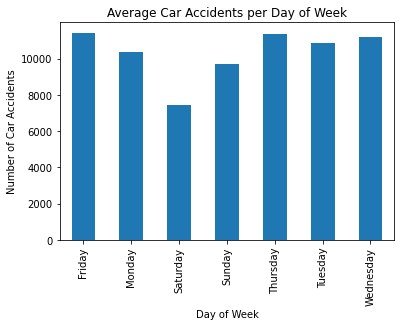

<Figure size 432x288 with 0 Axes>

In [77]:
# Use groupby to find out total crashes per days of week
a = crashes.groupby("DAY_OF_WEEK").size()
a.plot(kind='bar',stacked=False)
plt.title("Average Car Accidents per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Car Accidents")
plt.show()
plt.savefig("Average Car Accidents per Day of Week.png", bbox_inches="tight")